In [1]:
from settings import *
import matplotlib.pyplot as plt
import numpy as np

random_rho0s: setting seed=23731


In [2]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

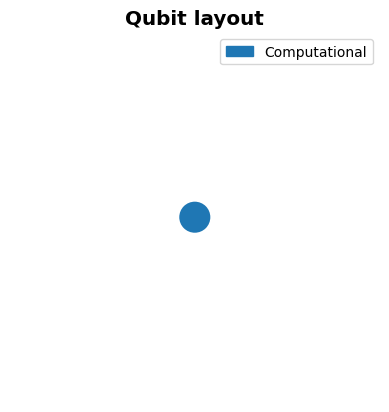

In [3]:
qubits.show_layout()

In [4]:
# theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100)

# theta_opt = np.save("ham_theta_opt.npy", theta_opt)
# thetas = np.save("ham_thetas.npy", thetas)
# errors = np.save("ham_errors.npy", errors)

In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([1.17265239, 1.42444153, 1.10623176, 1.5       , 1.10623176,
       1.50646394, 1.18914374, 1.5       , 1.18914374, 1.45348351,
       1.07577316, 1.5       , 1.07577316, 1.52582052, 1.23406214,
       1.5       , 1.23406214, 1.40720845, 1.06955469, 1.5       ])

In [7]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_readout_computational_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)

rho_rand_haar: seed=69480


c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

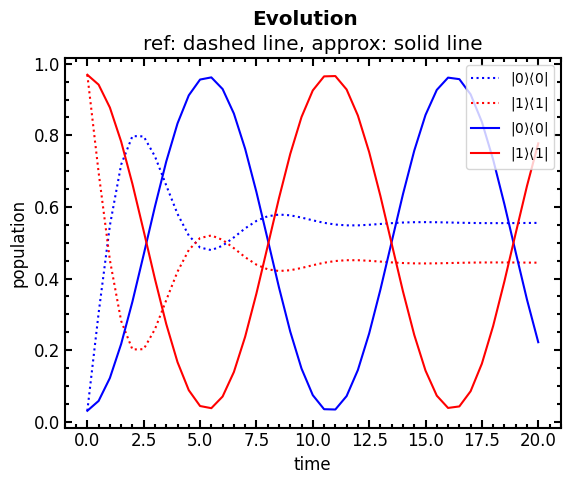

In [8]:
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=computation_basis_labels(1))

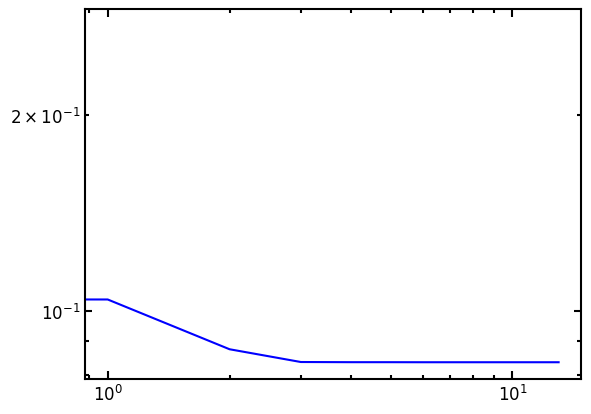

In [9]:
plt.loglog(errors)